# Polynomial Regression on Boston Housing Data

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston, MA. The following describes the dataset columns:

- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

In [4]:
# check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

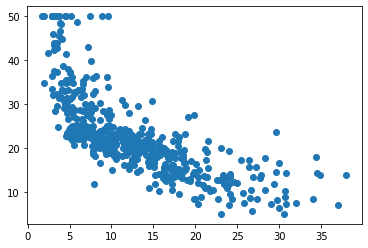

In [10]:
plt.scatter(X,y)

In [9]:
#declare variables
X = boston['LSTAT'].values.reshape(-1,1)
y = boston['MEDV'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

The degree chosen will be two. According to the plot, it appears to be half of a parabola.

In [51]:
# Fitting by 2nd degree
model = PolynomialFeatures(degree=2)
X_train_poly = model.fit_transform(X_train)
X_test_poly = model.fit_transform(X_test)

# Fit and predict the obtained polynomial model into linear regression.
linreg = LinearRegression()
polyreg_model = linreg.fit(X_train_poly,y_train)
y_pred = polyreg_model.predict(X_test_poly)

In [52]:
#r-squared
print('r2',r2_score(y_test, y_pred))

r2 0.642198223348954


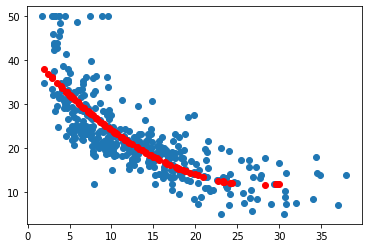

In [53]:
# plot the polynomial regression
plt.scatter(X_train,y_train)
plt.scatter(X_test, y_pred, color= 'red')

(array([13., 17., 19., 26., 11.,  6.,  1.,  3.,  4.,  2.]),
 array([-9.65206477, -6.87503481, -4.09800484, -1.32097488,  1.45605508,
         4.23308504,  7.01011501,  9.78714497, 12.56417493, 15.34120489,
        18.11823485]),
 <BarContainer object of 10 artists>)

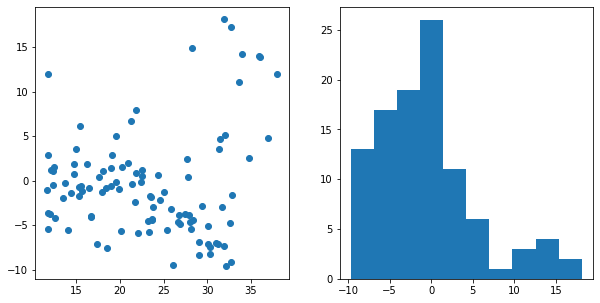

In [54]:
#residuals analysis
residuals = y_test - y_pred
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.scatter(y_pred, residuals)
ax2.hist(residuals)

With degree of 2, the residuals doesn't appear to be normal. 

In [68]:
# Fitting by 4th degree
model = PolynomialFeatures(degree=4)
X_train_poly = model.fit_transform(X_train)
X_test_poly = model.fit_transform(X_test)

# Fit and predict the obtained polynomial model into linear regression.
linreg = LinearRegression()
polyreg_model = linreg.fit(X_train_poly,y_train)
y_pred = polyreg_model.predict(X_test_poly)

In [69]:
#r-squared
print('r2',r2_score(y_test, y_pred))

r2 0.6904016242902854


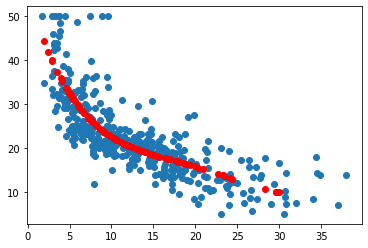

In [70]:
# plot the polynomial regression
plt.scatter(X_train,y_train)
plt.scatter(X_test, y_pred, color= 'red')

(array([ 8., 13., 29., 24., 12.,  6.,  2.,  3.,  2.,  3.]),
 array([-10.04001372,  -7.24537136,  -4.45072899,  -1.65608663,
          1.13855573,   3.9331981 ,   6.72784046,   9.52248282,
         12.31712519,  15.11176755,  17.90640991]),
 <BarContainer object of 10 artists>)

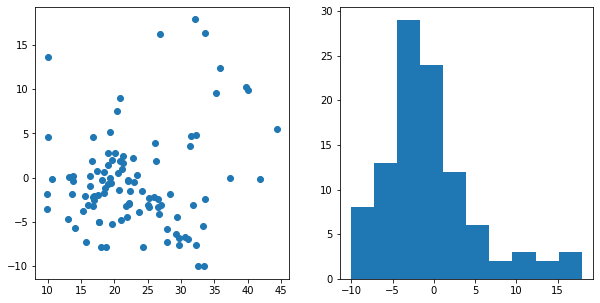

In [71]:
#residuals analysis
residuals = y_test - y_pred
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.scatter(y_pred, residuals)
ax2.hist(residuals)

With a degree of 4, r-squared increased by ~0.05 and residuals appear more normal but still slightly off the mean of zero.  